<a href="https://colab.research.google.com/github/mintseok/MachineLearning/blob/main/Deep%20Learnig%20from%20Scratch%202/Seq2Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/밑시딥2/DLFromScratch2

/content/drive/MyDrive/밑시딥2/DLFromScratch2


# Rnnlm Gen 클래스 구현

In [3]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from Chap06_Fancy_RNN.rnnlm import Rnnlm
from Chap06_Fancy_RNN.better_rnnlm import BetterRnnlm

class RnnlmGen(Rnnlm): # 상속
  def generate(self, start_id, skip_ids=None, sample_size=100):
    word_ids = [start_id]

    x = start_id
    while len(word_ids) < sample_size: # word_ids가 sample_size보다 작을 때까지 append 수행
      x = np.array(x).reshape(1, 1)
      score = self.predict(x) # 상속한 클래스에 속해있는 메소드
      p = softmax(score.flatten())

      sampled = np.random.choice(len(p), size=1, p=p) # 하나를 선택 (확률에 따라)
      if (skip_ids is None) or (sampled not in skip_ids):
        x = sampled
        word_ids.append(int(x))
    
    return word_ids

  def get_state(self):
    return self.lstm_layer.h, self.lstm_layer.c

  def set_state(self, state):
    self.lstm_layer.set_state(*state)

# 학습하지 않은 상태에서 위의 메서드 사용

In [4]:
pwd

'/content/drive/My Drive/밑시딥2/DLFromScratch2'

In [5]:
import sys
sys.path.append('..')
from Chap07_Seq2Seq.rnnlm_gen import RnnlmGen
from dataset import ptb

# 데이터 가져오기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('Rnnlm.pkl')  # 학습이 완료된 매개변수 파일

# 시작(start) 문자와 건너뜀(skip) 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문자 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace('<eos>', '.\n')
print(txt)

you identified to reach east bush 's grand jury .
 with a pall over this week board stock-market communist nicaraguan journalist if washington is a responsibility .
 the former former chief officer .
 fast .
 at the last lawsuit the pending research system said mr. seabrook .
 mr. parents including the firms and had slipping the story .
 the eliminate inefficient case of the corp is looking for comment .
 with the scientist mr. own raised consumer the jerome educational network power feel this facility by its attack equipped .
 applicants in the chicago industry said the company is comparable


# BetterRnnlm으로 똑같이 실행

In [6]:
import sys
sys.path.append('..')
from Chap07_Seq2Seq.rnnlm_gen import BetterRnnlmGen
from dataset import ptb

# 데이터 가져오기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('Rnnlm.pkl')  # 학습이 완료된 매개변수 파일

# 시작(start) 문자와 건너뜀(skip) 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문자 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace('<eos>', '.\n')
print(txt)

you ring any significant .
 while i think my way are n't exactly the most death note this is price campaign in the same open or ones the industry view .
 mr. roman also be sent to many people who make the predecessor committee noriega involved in paris .
 they 're covered by now he is beyond a wonder soon prevent the competition after the resolution somehow moved the network while the press would be built when the bush administration would need to settle the second election .
 earlier the royalty will be too much .
 the poll of cancer


# the meaning of life is ...

In [7]:
import sys
sys.path.append('..')
from Chap07_Seq2Seq.rnnlm_gen import BetterRnnlmGen
from dataset import ptb

# 데이터 가져오기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('Rnnlm.pkl')  # 학습이 완료된 매개변수 파일

# 시작(start) 문자와 건너뜀(skip) 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문자 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace('<eos>', '.\n')


model.reset_state()

start_words = 'my life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]: # the, meaning, of, life 에 대해 각각 predict -> 매개변수 저장
    x = np.array(x).reshape(1, 1)
    model.predict(x) 

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

my life is reducing the dark.
 the quickview required safe journal read with the soviet generation of the east bloc of the democratic cable boards the controversy was part less severe because i does n't 'd be very busy high.
 the start to resist the pinpoint in what we did something but failed to the trip of the best to each political satisfaction got the best meetings says one official opportunity to the facts.
 the same with the resignations of the old contract remains a new treaty delmed said in the second thing not as we know you see


# Seq2Seq 구현

In [8]:
# encoder 구현
from common.time_layers import *
class Encoder:
  def __init__(self, vocab, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V,D) / 100).astype('f')
    lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4*H).astype('f')

    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

    self.params = self.embed.params + self.lstm.params
    self.grads = self.embed.grads + self.lstm.grads
    self.hs = None

  def forward(self, xs):
    xs = self.embed.forward(xs)
    hs = self.lstm.forward(xs)
    self.hs = hs
    return hs[:, -1, :]

  def backward(self, dh):
    dhs = np.zeors_like(self.hs)
    dhs[:, -1, :] = dhs
    
    dout = self.lstm.backward(dhs)
    dout = self.embed.backward(dout)
    return dout  

In [9]:
# decoder 구현
class Decoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4 * H).astype('f')
    affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
    self.affine = TimeAffine(affine_W, affine_b)

    self.params, self.grads = [], []
    for layer in (self.embed, self.lstm, self.affine):
      self.params += layer.params
      self.grads += layer.grads

  def forward(self, xs, h):
    self.lstm.set_state(h)

    out = self.embed.forward(xs)
    out = self.lstm.forward(out)
    score = self.affine.forward(out)
    return score

  def backward(self, dscore):
    dout = self.affine.backward(dscore)
    dout = self.lstm.backward(dout)
    dout = self.embed.backward(dout)
    dh = self.lstm.dh
    return dh

  def generate(self, h, start_id, sample_size):
    sampled = []
    sample_id = start_id
    self.lstm.set_state(h)

    for _ in range(sample_size):
      x = np.array(sample_id).reshape((1, 1))
      out = self.embed.forward(x)
      out = self.lstm.forward(out)
      score = self.affine.forward(out)

      sample_id = np.argmax(score.flatten())
      sampled.append(int(sample_id))

    return sampled

In [10]:
# Seq2Seq 구현
from common.base_model import BaseModel

class Seq2seq(BaseModel):
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    self.encoder = Encoder(V, D, H)
    self.decoder = Decoder(V, D, H)
    self.softmax = TimeSoftmaxWithLoss()

    self.params = self.encoder.params + self.decoder.params
    self.grads = self.encoder.grads + self.decoder.grads

  def forward(self, xs, ts):
    decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

    h = self.encoder.forward(xs)
    score = self.decoder.forward(decoder_xs, h)
    loss = self.softmax.forward(score, decoder_ts)
    return loss

  def backward(self, dout=1):
    dout = self.softmax.backward(dout)
    dh = self.decoder.backward(dout)
    dout = self.encoder.backward(dh)
    return dout

  def generate(self, xs, start_id, sample_size):
    h = self.encoder.forward(xs)
    sampled = self.decoder.generate(h, start_id, sample_size)
    return sampled

# 모델 학습시키기

In [22]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from Chap07_Seq2Seq.seq2seq import Seq2seq
from Chap07_Seq2Seq.peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 10
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 설정
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
#model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('검증 정확도 %.3f%%' %(acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 8[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 9[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 10[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 12[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 13[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 14[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 15[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 16[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
---
Q

In [23]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from Chap07_Seq2Seq.seq2seq import Seq2seq
from Chap07_Seq2Seq.peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 10
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 설정
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
#model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list_1 = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  acc = float(correct_num) / len(x_test)
  acc_list_1.append(acc)
  print('검증 정확도 %.3f%%' %(acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 8[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 9[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 12[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 13[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 14[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 15[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 16[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48+285
T 666 
☒ 1001
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1001
---
Q 752+006
T 857 
☒ 1000
---
Q 292+167
T 1053
☒ 1000
---
Q 795+038
T 1427
☒ 1000
---
Q

In [24]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from Chap07_Seq2Seq.seq2seq import Seq2seq
from Chap07_Seq2Seq.peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 10
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 설정
#model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list_2 = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
  acc = float(correct_num) / len(x_test)
  acc_list_2.append(acc)
  print('검증 정확도 %.3f%%' %(acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 6[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 7[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 8[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 9[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 12[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 13[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 14[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 15[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 16[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 17[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  48+285
T 666 
☒ 102 
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1023
---
Q 752+006
T 857 
☒ 1023
---
Q 292+167
T 1053
☒ 1023
---
Q 795+038
T 1427
☒ 1111
---


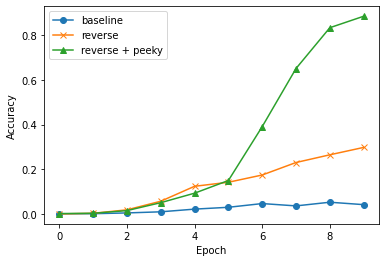

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(acc_list, marker = 'o', label="baseline")
plt.plot(acc_list_1, marker = 'x', label="reverse")
plt.plot(acc_list_2, marker = '^', label="reverse + peeky")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()